In [ ]:
pip install nltk pandas matplotlib seaborn


In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download the vader_lexicon resource
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Load the dataset
# Assuming your dataset is in a CSV file named 'threads_reviews.csv'
df = pd.read_csv('/content/threads_reviews.csv')

In [ ]:
# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

In [ ]:
# Function to get sentiment polarity
def get_sentiment_polarity(review):
    return sia.polarity_scores(review)['compound']

In [ ]:
# Apply the function to the 'review_description' column and create a new column 'sentiment'
df['sentiment'] = df['review_description'].apply(get_sentiment_polarity)

# Classify sentiment into categories (positive, negative, neutral)
df['sentiment_category'] = df['sentiment'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))

# # Display the results
# print(df[['review_description', 'sentiment', 'sentiment_category']])
overall_sentiment = 'Positive' if df['sentiment'].mean() > 0 else ('Negative' if df['sentiment'].mean() < 0 else 'Neutral')

# Display the results
print("Summary of Sentiment Analysis:")
print("Overall Sentiment: {}".format(overall_sentiment))
print("\nSample Reviews:")
print(df[['review_description', 'sentiment', 'sentiment_category']].head())

Summary of Sentiment Analysis:
Overall Sentiment: Positive

Sample Reviews:
                                  review_description  sentiment  \
0  Meh. Not the greatest experience on a Chromebo...    -0.7117   
1  Pretty good for a first launch!! Its easy to u...     0.9899   
2  For a brand new app, it's very well optimized....     0.9076   
3  Great app with a lot of potential! However, th...     0.4114   
4  The app is good, but it needs a lot of functio...     0.8860   

  sentiment_category  
0           negative  
1           positive  
2           positive  
3           positive  
4           positive  


In [ ]:
average_sentiments = df.groupby('rating')['sentiment'].mean()
# Display sentiment analysis for each star rating category
for rating, avg_sentiment in average_sentiments.items():
    sentiment_category = 'Positive' if avg_sentiment > 0 else ('Negative' if avg_sentiment < 0 else 'Neutral')

    print("\nSentiment Analysis for {}-Star Ratings:".format(rating))
    print("Average Sentiment: {}".format(avg_sentiment))
    print("Sentiment Category: {}".format(sentiment_category))


Sentiment Analysis for 1-Star Ratings:
Average Sentiment: -0.09418631503187333
Sentiment Category: Negative

Sentiment Analysis for 2-Star Ratings:
Average Sentiment: 0.0682956570155902
Sentiment Category: Positive

Sentiment Analysis for 3-Star Ratings:
Average Sentiment: 0.2089582591876209
Sentiment Category: Positive

Sentiment Analysis for 4-Star Ratings:
Average Sentiment: 0.36979808877928483
Sentiment Category: Positive

Sentiment Analysis for 5-Star Ratings:
Average Sentiment: 0.3650443216144997
Sentiment Category: Positive


In [ ]:
overall_rating = df['rating'].mean()

# Display the overall rating
print("Overall Rating for the Application: {:.2f}".format(overall_rating))

Overall Rating for the Application: 3.40


In [ ]:
# Optional: If you want to analyze 1-star and 5-star reviews separately
one_star_reviews = df[df['rating'] == 1]
five_star_reviews = df[df['rating'] == 5]

# Print the results for 1-star reviews
print("1-Star Reviews:")
print(one_star_reviews[['review_description', 'sentiment', 'sentiment_category']])

# Print the results for 5-star reviews
print("5-Star Reviews:")
print(five_star_reviews[['review_description', 'sentiment', 'sentiment_category']])

1-Star Reviews:
                                      review_description  sentiment  \
6      I still don’t want to see content from people ...    -0.2960   
12     Pointless in following anyone. The feed algo w...    -0.0606   
24     Constant crashing when trying to upload most p...     0.3382   
28     As soon as I opened the app, it went good, the...     0.5478   
33     I don't normally write reviews but I'm so anno...    -0.7636   
...                                                  ...        ...   
32905  This killed my dog. Mark zuckerburg strangled ...    -0.8402   
32906              Add Search and hashtag like Twitter !     0.4199   
32907                                        bad twister    -0.5423   
32908                       Yet another trash from Meta.     0.0000   
32909  Nothing special this app is just a copy of twi...    -0.3089   

      sentiment_category  
6               negative  
12              negative  
24              positive  
28              positiv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download the vader_lexicon resource
nltk.download('vader_lexicon')

# Load the dataset
# Assuming your dataset is in a CSV file named 'instagram_threads_reviews.csv'
df = pd.read_csv('threads_reviews.csv')

# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

# Function to get sentiment polarity
def get_sentiment_polarity(review):
    return sia.polarity_scores(review)['compound']

# Apply the function to the 'review_description' column and create a new column 'sentiment'
df['sentiment'] = df['review_description'].apply(get_sentiment_polarity)

# Classify sentiment into categories (positive, negative, neutral)
df['sentiment_category'] = df['sentiment'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))

# Calculate the overall rating
overall_rating = df['rating'].mean()

# Set the style for the plots
sns.set(style="whitegrid")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


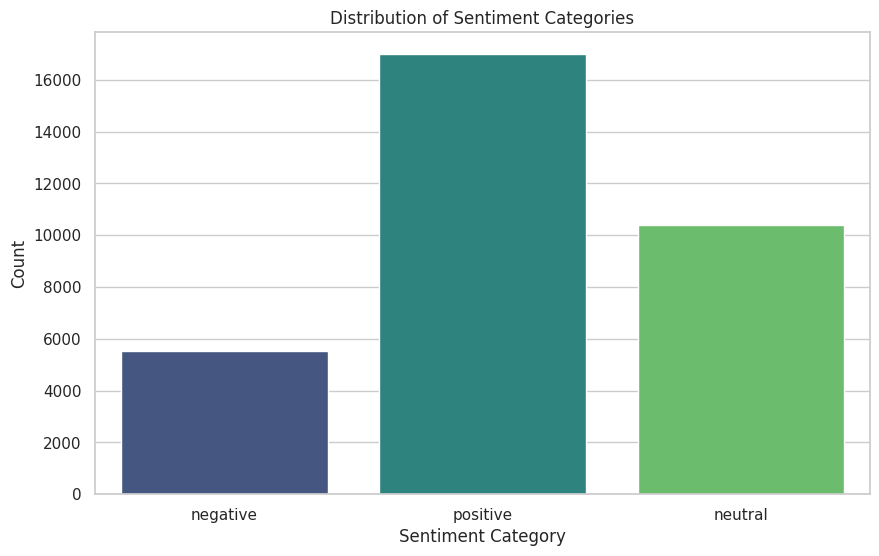

In [ ]:
# Plotting the distribution of sentiment categories
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_category', data=df, palette="viridis")
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

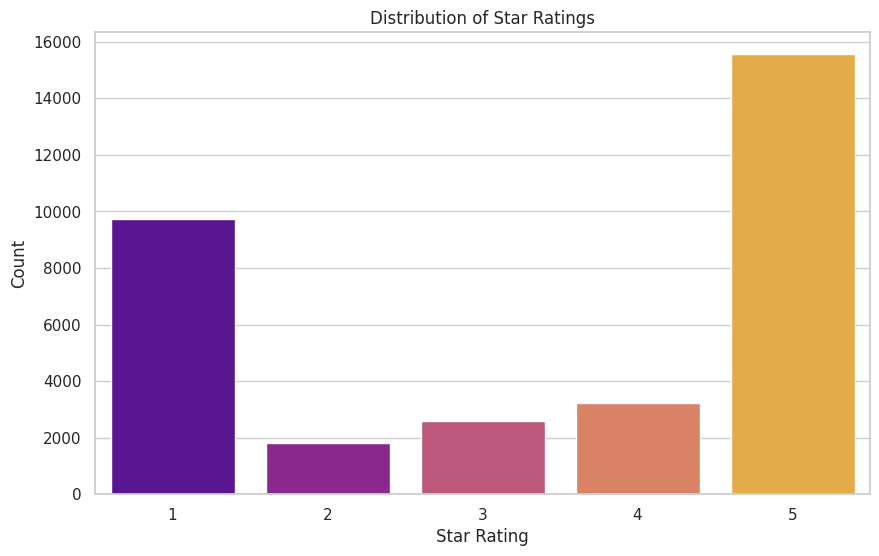

In [ ]:
# Plotting the distribution of star ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, palette="plasma")
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()

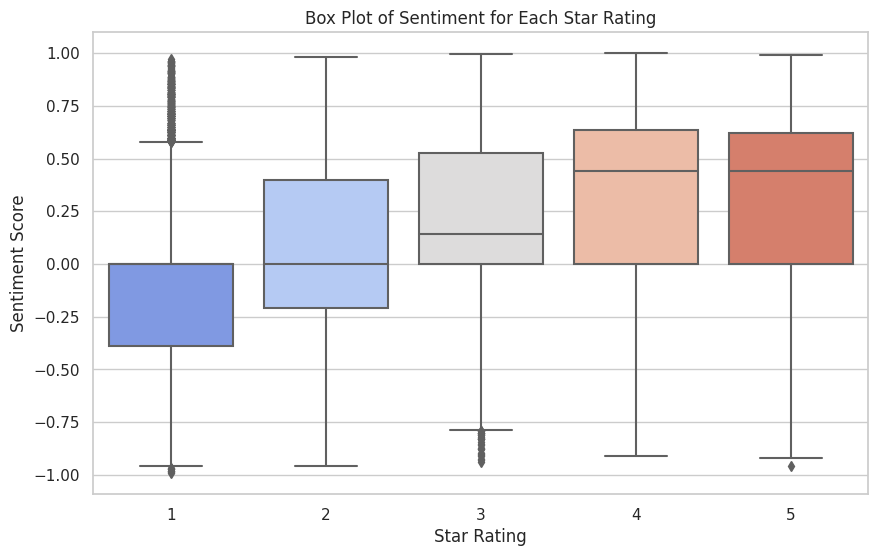

In [ ]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='sentiment', data=df, palette="coolwarm")
plt.title('Box Plot of Sentiment for Each Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Sentiment Score')
plt.show()

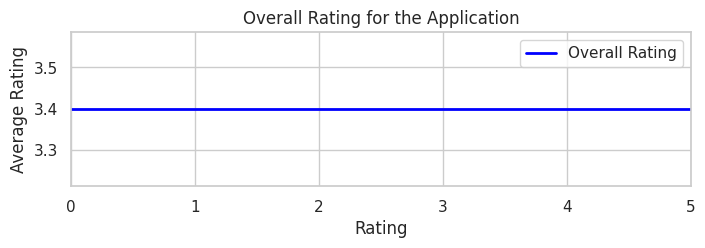

In [ ]:
import matplotlib.pyplot as plt

# Plotting the overall rating as a horizontal line
plt.figure(figsize=(8, 2))
plt.axhline(y=overall_rating, color='blue', linestyle='-', linewidth=2, label='Overall Rating')
plt.title('Overall Rating for the Application')
plt.xlabel('Rating')
plt.ylabel('Average Rating')
plt.xlim(0, 5)  # Set x-axis limit to match the rating scale
plt.legend()
plt.show()
